In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
pd.options.display.float_format = '{:.6f}'.format


/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [95]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')

In [96]:
df_train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.600000,309.600000,1596,36.100000,140,0,0,0,0,0,0
1,1,M20343,M,302.600000,312.100000,1759,29.100000,200,0,0,0,0,0,0
2,2,L49454,L,299.300000,308.500000,1805,26.500000,25,0,0,0,0,0,0
3,3,L53355,L,301.000000,310.900000,1524,44.300000,197,0,0,0,0,0,0
4,4,M24050,M,298.000000,309.000000,1641,35.400000,34,0,0,0,0,0,0


In [97]:
print('Data description:')

print(f'Data shape: {df_train.shape}\n\n\n')

print(f"na values: {df_train.isna().sum()}\n\n\n")

print(f'Data types are: {df_train.dtypes}')


Data description:
Data shape: (136429, 14)



na values: id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64



Data types are: id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


In [98]:

(df_train['Product ID'].nunique())

9976

In [99]:
df_train[['Tool wear [min]','Rotational speed [rpm]']] = df_train[['Tool wear [min]','Rotational speed [rpm]']].astype('float64')

In [100]:
df_train.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

It is possible to derive some information from the Product ID column, but it doesnt seem to worth it. Perhaps the numeric part of the ID has some meaning and relavance.


In [101]:
df_train_numeric = df_train.select_dtypes(include = ['float64'])
df_train_categoric = df_train.select_dtypes(include = ['int64','object']).drop(['id', 'Product ID', 'Machine failure'], axis = 1)

In [102]:
df_train_numeric

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,300.600000,309.600000,1596.000000,36.100000,140.000000
1,302.600000,312.100000,1759.000000,29.100000,200.000000
2,299.300000,308.500000,1805.000000,26.500000,25.000000
3,301.000000,310.900000,1524.000000,44.300000,197.000000
4,298.000000,309.000000,1641.000000,35.400000,34.000000
...,...,...,...,...,...
136424,300.100000,311.400000,1530.000000,37.500000,210.000000
136425,297.500000,308.500000,1447.000000,49.100000,2.000000
136426,300.500000,311.800000,1524.000000,38.500000,214.000000
136427,301.700000,310.900000,1447.000000,46.300000,42.000000


In [103]:
df_train_categoric

,Type,TWF,HDF,PWF,OSF,RNF
0,L,0,0,0,0,0
1,M,0,0,0,0,0
2,L,0,0,0,0,0
3,L,0,0,0,0,0
4,M,0,0,0,0,0
...,...,...,...,...,...,...
136424,M,0,0,0,0,0
136425,H,0,0,0,0,0
136426,L,0,0,0,0,0
136427,L,0,0,0,0,0


EDA: numeric data

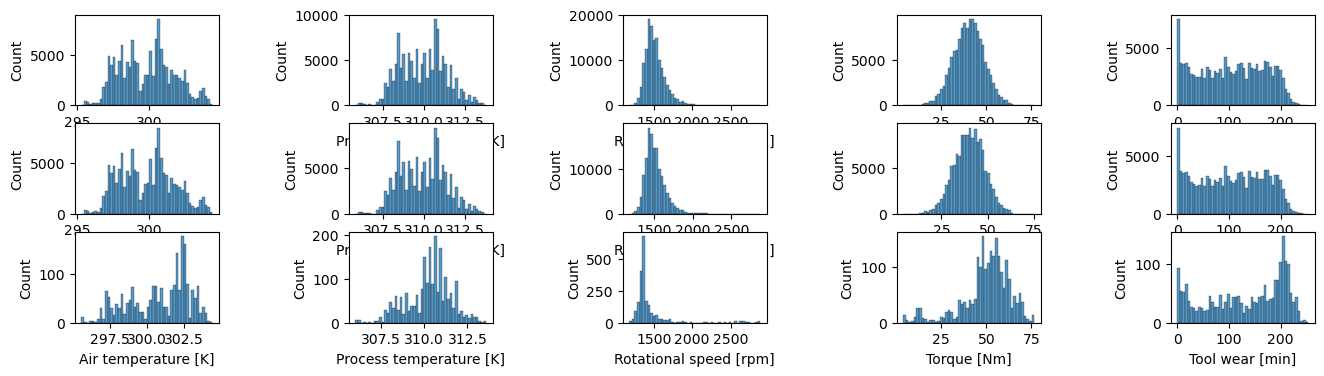

In [104]:
n = len(df_train_numeric.columns)


fig, ax = plt.subplots(3, n, figsize=(16,4))
plt.subplots_adjust(wspace=0.9)
df = df_train_numeric.copy()
df['Machine failure']= df_train ['Machine failure']
df0 = df[df['Machine failure']==0]
df1 = df[df['Machine failure']==1]
for i in range(0, n):
#     print('{}, {}'.format(int(i/5),i % 5))
    sns.histplot(data=df_train_numeric, x =df_train_numeric.iloc[:,i], bins=50, ax=ax[0,i % n])
    sns.histplot(data=df0, x =df0.iloc[:,i], bins=50, ax=ax[1,i % n])
    sns.histplot(data=df1, x =df1.iloc[:,i], bins=50, ax=ax[2,i % n])



#     ax[int(i/5), i % 5].set_title(df_train_numerical.columns[i])

# Adjust the vertical spacing between subplots    

plt.show()

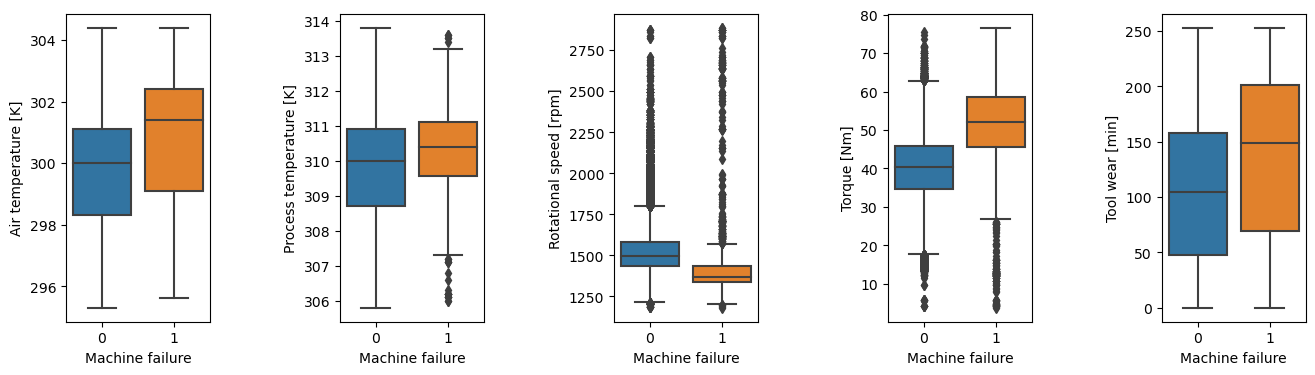

In [105]:
fig, ax = plt.subplots(1,n, figsize = (16,4))
plt.subplots_adjust(wspace = 0.9)

for i in range(0, len(ax.flatten())):


    sns.boxplot(data = df_train, x = 'Machine failure' , y = df_train_numeric.columns[i], ax = ax[i%n])

Text(0.5, 1.0, 'Failure distribution')

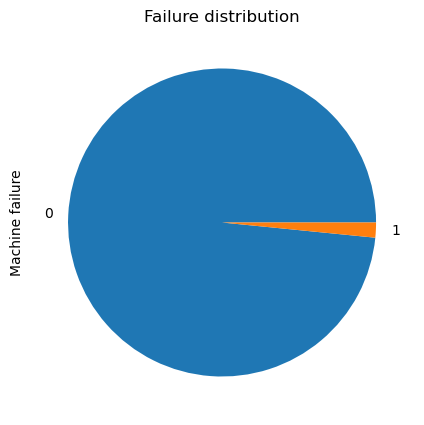

In [106]:

fig = plt, plt.figure (figsize = (5,5))
df_train['Machine failure'].value_counts().plot(kind = 'pie')
plt.title('Failure distribution')

# The data is very unbalanced

# Lets use Robustscaler to deal with outliers. I will visualize the effect of scaling on the data after applying RobustScaler,

In [107]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
index = df_train.index 
scaled_train = scaler.fit_transform(df_train[df_train_numeric.columns])
scaled_train = pd.DataFrame(scaled_train, columns = df_train_numeric.columns)
df = df_train.drop(df_train_numeric.columns, axis = 1)
scaled_train = pd.concat([scaled_train,df], axis = 1)

In [108]:
scaled_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],id,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.206897,-0.181818,0.695946,-0.373913,0.306306,0,L50096,L,0,0,0,0,0,0
1,0.896552,0.954545,1.797297,-0.982609,0.846847,1,M20343,M,0,0,0,0,0,0
2,-0.241379,-0.681818,2.108108,-1.208696,-0.729730,2,L49454,L,0,0,0,0,0,0
3,0.344828,0.409091,0.209459,0.339130,0.819820,3,L53355,L,0,0,0,0,0,0
4,-0.689655,-0.454545,1.000000,-0.434783,-0.648649,4,M24050,M,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.034483,0.636364,0.250000,-0.252174,0.936937,136424,M22284,M,0,0,0,0,0,0
136425,-0.862069,-0.681818,-0.310811,0.756522,-0.936937,136425,H38017,H,0,0,0,0,0,0
136426,0.172414,0.818182,0.209459,-0.165217,0.972973,136426,L54690,L,0,0,0,0,0,0
136427,0.586207,0.409091,-0.310811,0.513043,-0.576577,136427,L53876,L,0,0,0,0,0,0


In [109]:
scaled_train_numeric = scaled_train.select_dtypes(include = ['float64'])

# Correlation bewteen the numeric data:

In [110]:


correlation = df_train_numeric.corr()
# Get the pairs with highest correlation (excluding self-correlation)
pairs = correlation.unstack().sort_values(ascending=False)
top_pairs = pairs[pairs.index.get_level_values(0) != pairs.index.get_level_values(1)].nlargest(10)

print(top_pairs)

Air temperature [K]      Process temperature [K]   0.856080
Process temperature [K]  Air temperature [K]       0.856080
Tool wear [min]          Air temperature [K]       0.016994
Air temperature [K]      Tool wear [min]           0.016994
Rotational speed [rpm]   Air temperature [K]       0.016545
Air temperature [K]      Rotational speed [rpm]    0.016545
Process temperature [K]  Tool wear [min]           0.012777
Tool wear [min]          Process temperature [K]   0.012777
Rotational speed [rpm]   Process temperature [K]   0.011263
Process temperature [K]  Rotational speed [rpm]    0.011263
dtype: float64


# Dealing with unbalanced data:
Note that undersampling would not work (We will lose a huge portion of the data by doing it).

In [111]:
neg,pos = np.bincount(scaled_train['Machine failure']) #pos is the 1, neg is 0
total = neg + pos

In [112]:
weight_for_0 = (1/neg)*(total/2.0)
weight_for_1 = (1/pos)*(total/2.0)
class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 31.76


In [113]:
scaled_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],id,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.206897,-0.181818,0.695946,-0.373913,0.306306,0,L50096,L,0,0,0,0,0,0
1,0.896552,0.954545,1.797297,-0.982609,0.846847,1,M20343,M,0,0,0,0,0,0
2,-0.241379,-0.681818,2.108108,-1.208696,-0.729730,2,L49454,L,0,0,0,0,0,0
3,0.344828,0.409091,0.209459,0.339130,0.819820,3,L53355,L,0,0,0,0,0,0
4,-0.689655,-0.454545,1.000000,-0.434783,-0.648649,4,M24050,M,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.034483,0.636364,0.250000,-0.252174,0.936937,136424,M22284,M,0,0,0,0,0,0
136425,-0.862069,-0.681818,-0.310811,0.756522,-0.936937,136425,H38017,H,0,0,0,0,0,0
136426,0.172414,0.818182,0.209459,-0.165217,0.972973,136426,L54690,L,0,0,0,0,0,0
136427,0.586207,0.409091,-0.310811,0.513043,-0.576577,136427,L53876,L,0,0,0,0,0,0


In [114]:
X = scaled_train.drop(['Machine failure','id','Product ID'], axis =1)
y = scaled_train['Machine failure']

In [115]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [116]:
cols ={'Air temperature [K]': 'Air temprature', 'Process temperature [K]':'Process temprature',
       'Rotational speed [rpm]':'Rotational speed', 'Torque [Nm]': 'Torgue', 'Tool wear [min]':'Tool wear'}
X=X.rename(columns= cols)

In [117]:
X['Type'] = X['Type'].apply(lambda x: ord(x) - ord('A'))

X

,Air temprature,Process temprature,Rotational speed,Torgue,Tool wear,Type,TWF,HDF,PWF,OSF,RNF
0,0.206897,-0.181818,0.695946,-0.373913,0.306306,11,0,0,0,0,0
1,0.896552,0.954545,1.797297,-0.982609,0.846847,12,0,0,0,0,0
2,-0.241379,-0.681818,2.108108,-1.208696,-0.729730,11,0,0,0,0,0
3,0.344828,0.409091,0.209459,0.339130,0.819820,11,0,0,0,0,0
4,-0.689655,-0.454545,1.000000,-0.434783,-0.648649,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.034483,0.636364,0.250000,-0.252174,0.936937,12,0,0,0,0,0
136425,-0.862069,-0.681818,-0.310811,0.756522,-0.936937,7,0,0,0,0,0
136426,0.172414,0.818182,0.209459,-0.165217,0.972973,11,0,0,0,0,0
136427,0.586207,0.409091,-0.310811,0.513043,-0.576577,11,0,0,0,0,0


In [118]:
y

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [119]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [10, 20, 30 ],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
    # Add other parameters you want to tune
}

lgb_model = lgb.LGBMClassifier()


grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X, y, sample_weight=[class_weights[i] for i in y])

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [120]:
cv_results = grid_search.cv_results_
accuracy_scores = cv_results['mean_test_score']

In [121]:
accuracy_scores

array([0.96890691, 0.97554772, 0.98125764, 0.97560637, 0.98362517,
       0.98878537, 0.97966708, 0.98804506, 0.99180526, 0.94029873,
       0.95749435, 0.96120329, 0.95822735, 0.95861582, 0.96283782,
       0.96043364, 0.9620242 , 0.96603362])

In [122]:
prob = best_model.predict_proba(X)

In [123]:
prob.round(5)

array([[0.99631, 0.00369],
       [0.99422, 0.00578],
       [0.99776, 0.00224],
       ...,
       [0.96405, 0.03595],
       [0.91309, 0.08691],
       [0.95846, 0.04154]])

In [124]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e17/sample_submission.csv')

In [125]:
sample_submission

,id,Machine failure
0,136429,0.500000
1,136430,0.500000
2,136431,0.500000
3,136432,0.500000
4,136433,0.500000
...,...,...
90949,227378,0.500000
90950,227379,0.500000
90951,227380,0.500000
90952,227381,0.500000


In [126]:
test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.300000,311.500000,1499,38.000000,60,0,0,0,0,0
1,136430,L53866,L,301.700000,311.000000,1713,28.800000,17,0,0,0,0,0
2,136431,L50498,L,301.300000,310.400000,1525,37.700000,96,0,0,0,0,0
3,136432,M21232,M,300.100000,309.600000,1479,47.600000,5,0,0,0,0,0
4,136433,M19751,M,303.400000,312.300000,1515,41.300000,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.300000,311.400000,1484,40.400000,15,0,0,0,0,0
90950,227379,L47783,L,297.900000,309.800000,1542,33.800000,31,0,0,0,0,0
90951,227380,L48097,L,295.600000,306.200000,1501,41.400000,187,0,0,0,0,0
90952,227381,L48969,L,298.100000,307.800000,1534,40.300000,69,0,0,0,0,0


In [127]:
X_test = test.drop(['id', 'Product ID'], axis = 1)
X_test = X_test.rename(columns = cols)
X_test['Type'] = X_test['Type'].apply(lambda x: ord(x)- ord('A'))

In [128]:
X_test[['Rotational speed', 'Tool wear']]=X_test[['Rotational speed', 'Tool wear']].astype('float64')

In [129]:
X_test.dtypes

Type                    int64
Air temprature        float64
Process temprature    float64
Rotational speed      float64
Torgue                float64
Tool wear             float64
TWF                     int64
HDF                     int64
PWF                     int64
OSF                     int64
RNF                     int64
dtype: object

In [130]:
scaler = RobustScaler()
X_test_numeric = X_test.select_dtypes(include = ['float64'])
index = X_test.index 
scaled_train = scaler.fit_transform(X_test[X_test_numeric.columns])
scaled_train = pd.DataFrame(scaled_train, columns = X_test_numeric.columns)
df = X_test.drop(X_test_numeric.columns, axis = 1)
X_test= pd.concat([scaled_train,df], axis = 1)
X_test

,Air temprature,Process temprature,Rotational speed,Torgue,Tool wear,Type,TWF,HDF,PWF,OSF,RNF
0,0.793103,0.681818,0.040816,-0.215517,-0.418182,11,0,0,0,0,0
1,0.586207,0.454545,1.496599,-1.008621,-0.809091,11,0,0,0,0,0
2,0.448276,0.181818,0.217687,-0.241379,-0.090909,11,0,0,0,0,0
3,0.034483,-0.181818,-0.095238,0.612069,-0.918182,12,0,0,0,0,0
4,1.172414,1.045455,0.149660,0.068966,0.072727,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
90949,0.793103,0.636364,-0.061224,-0.008621,-0.827273,11,0,0,0,0,0
90950,-0.724138,-0.090909,0.333333,-0.577586,-0.681818,11,0,0,0,0,0
90951,-1.517241,-1.727273,0.054422,0.077586,0.736364,11,0,0,0,0,0
90952,-0.655172,-1.000000,0.278912,-0.017241,-0.336364,11,0,0,0,0,0


In [131]:
y_pred = best_model.predict_proba(X_test)

In [132]:
y_pred = y_pred[:,1].round(8)

In [133]:
y_pred

array([0.01591038, 0.04271138, 0.00308497, ..., 0.00555985, 0.00319432,
       0.01308998])

In [134]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e17/sample_submission.csv')
submission['Machine failure'] = y_pred
submission['Machine failure']



0       0.015910
1       0.042711
2       0.003085
3       0.003038
4       0.007471
          ...   
90949   0.006215
90950   0.004629
90951   0.005560
90952   0.003194
90953   0.013090
Name: Machine failure, Length: 90954, dtype: float64

In [135]:
submission.to_csv(r"submission.csv", index=False)

# Train-test-split